In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [2]:
#Data Ingestion
df=pd.read_csv(r"C:\Users\XMALL\Downloads\archive (12)\train_u6lujuX_CVtuZ9i (1).csv",usecols=['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'])

In [3]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# Data visualization

In [5]:
gender_count=df['Gender'].value_counts()

In [6]:
indices=range(len(gender_count))

In [7]:
categorical_columns=[column for column in df.columns if df[column].dtypes=='O']
numerical_columns=[column for column in df.columns if df[column].dtypes!='O']

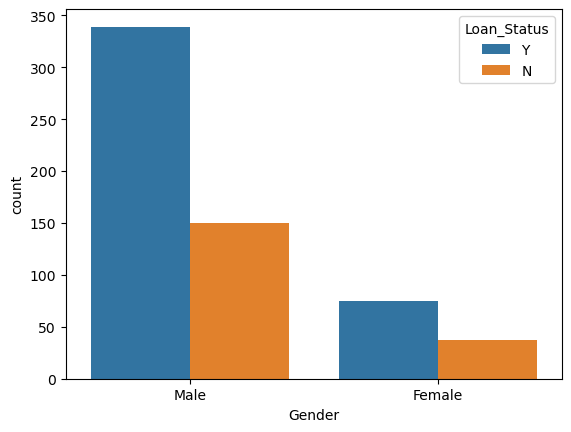

In [8]:
sns.countplot(x='Gender',data=df,hue='Loan_Status')
plt.show()

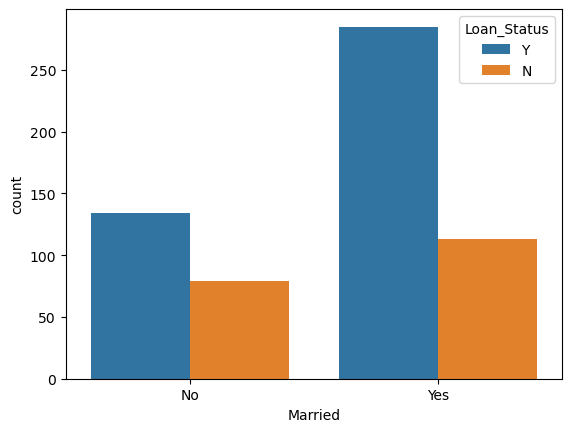

In [9]:
sns.countplot(x='Married',data=df,hue='Loan_Status')
plt.show()

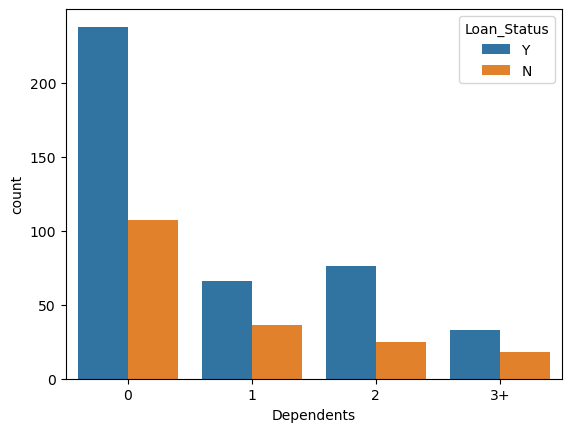

In [10]:
sns.countplot(x='Dependents',data=df,hue='Loan_Status')
plt.show()

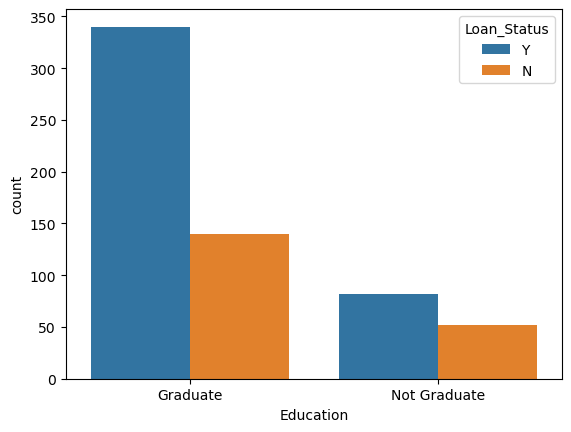

In [11]:
sns.countplot(x='Education',data=df,hue='Loan_Status')
plt.show()

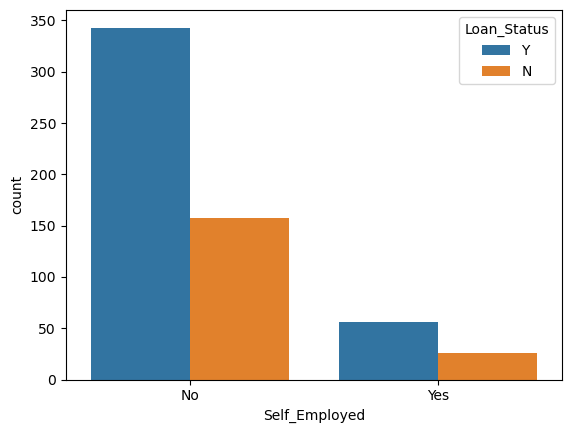

In [12]:

sns.countplot(x='Self_Employed',data=df,hue='Loan_Status')
plt.show()

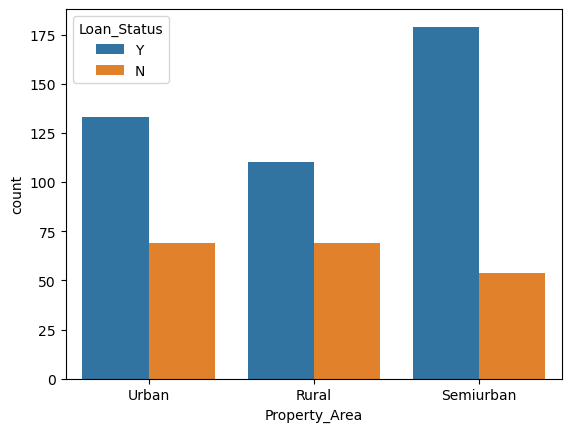

In [13]:
sns.countplot(x='Property_Area',data=df,hue='Loan_Status')
plt.show()

In [14]:
df.shape

(614, 12)

In [15]:
# Checking the outlier using boxplot

C:\Users\XMALL\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


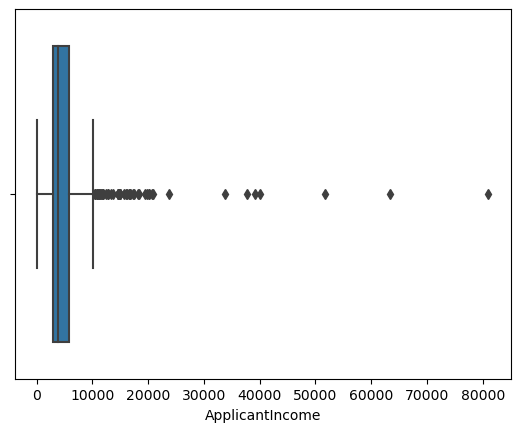

<Figure size 640x480 with 0 Axes>

C:\Users\XMALL\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


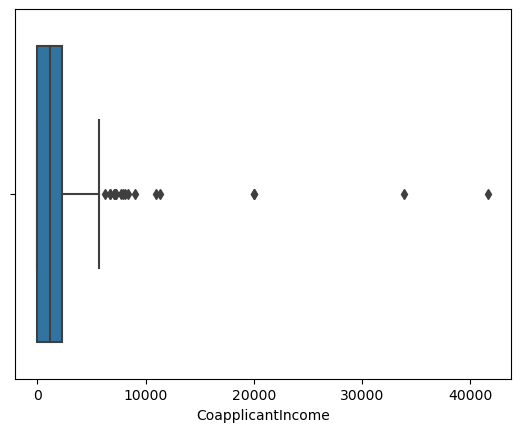

<Figure size 640x480 with 0 Axes>

C:\Users\XMALL\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


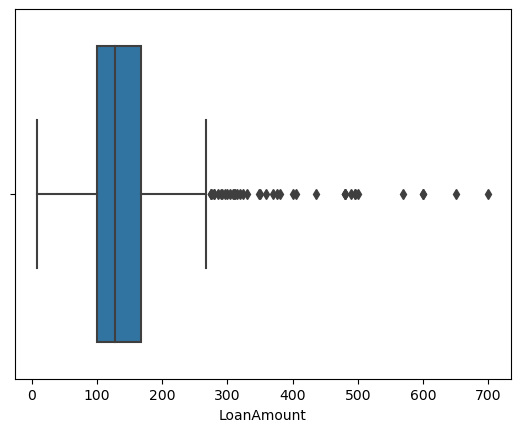

<Figure size 640x480 with 0 Axes>

C:\Users\XMALL\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


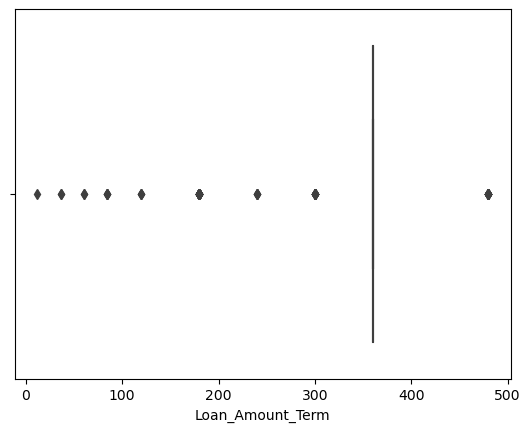

<Figure size 640x480 with 0 Axes>

C:\Users\XMALL\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


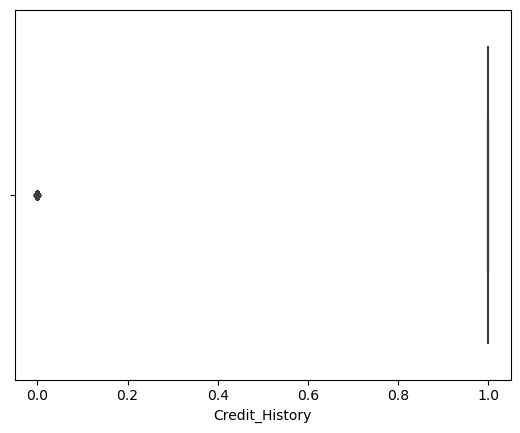

<Figure size 640x480 with 0 Axes>

In [16]:
for i in df[numerical_columns]:
    
    sns.boxplot(df[i])
    plt.figure()
    plt.show()

In [17]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [18]:


df['Loan_Status']=pd.get_dummies(df['Loan_Status'],drop_first=True)

In [19]:
class data_transformation:
    def __init__(self,data):
        self.data=data
    def get_data_transformer_object(self):
        categorical_feature=[column for column in self.data.columns if self.data[column].dtypes=='O']
        numerical_feature=[column for column in self.data.columns if self.data[column].dtypes!='O' and column!='Loan_Status']
        numerical_pipeline=Pipeline([('imputing',SimpleImputer(strategy='mean')),('scaling',StandardScaler())])
        categorical_pipeline=Pipeline([('imputing',SimpleImputer(strategy='most_frequent')),('encoder',OrdinalEncoder())])
        preprocessor=ColumnTransformer(
                [("num_pipeline",numerical_pipeline,numerical_feature),("cat_pipeline",categorical_pipeline,categorical_feature)]
            )

        return preprocessor
    
    def initiate_data_transformation(self):
        preprocessor=self.get_data_transformer_object()
        train_df,test_df=train_test_split(self.data,train_size=0.75,random_state=42)
        x_train=train_df.drop('Loan_Status',axis=1)
        y_train=train_df['Loan_Status']
        x_test=test_df.drop('Loan_Status',axis=1)
        y_test=test_df['Loan_Status']
        input_feature_train_arr=preprocessor.fit_transform(x_train)
            
        input_feature_test_arr=preprocessor.transform(x_test)
        train_arr=np.c_[input_feature_train_arr,np.array(y_train)]
        test_arr=np.c_[input_feature_test_arr,np.array(y_test)]
        
        return (train_arr,test_arr)
        
        

In [20]:
def evaluate_models(X_train, y_train,X_test,y_test,models,param):
    
    report = {}

    for i in range(len(list(models))):
        
        model = list(models.values())[i]
        para=param[list(models.keys())[i]]

        gs = GridSearchCV(model,para,cv=3)
        gs.fit(X_train,y_train)

        model.set_params(**gs.best_params_)
        model.fit(X_train,y_train) # Train model

        

        y_train_pred = model.predict(X_train)

        y_test_pred = model.predict(X_test)

        train_model_score = accuracy_score(y_train, y_train_pred)

        test_model_score = accuracy_score(y_test, y_test_pred)
        print(train_model_score,test_model_score)

        report[list(models.keys())[i]] = test_model_score



    return report

In [21]:
# Training on 4 different classification model (Random forest,SVC,Logistic regression,Decision tree)

In [22]:
class ModelTrainer:
    def __init__(self):
        self.train_array,self.test_array=data_transformation(df).initiate_data_transformation()
        
    def initiate_model_trainer(self):
        

        X_train,y_train,X_test,y_test=(self.train_array[:,:-1],self.train_array[:,-1],self.test_array[:,:-1],self.test_array[:,-1])

        models={'Logistic_Regression':LogisticRegression(),

                'svc':SVC(),
                'DecisionTreeClassifier':DecisionTreeClassifier(),

                'RandomForest':RandomForestClassifier()}
        params={

            'RandomForest' : {'n_estimators': [50, 100, 200],'max_depth': [5, 10, 20],'min_samples_split': [2, 5, 10],'min_samples_leaf': \
                              [1, 2, 4],'max_features': ['sqrt', 'log2']},
            'Logistic_Regression' :{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],'penalty': ['l1', 'l2']},

            'svc' : {'C': [0.1, 1, 10],'kernel': ['linear', 'poly', 'rbf'],'degree': [2, 3, 4],'gamma': ['scale', 'auto']},
            'DecisionTreeClassifier':{'criterion':['gini','entropy',],'max_depth':[2,4,6,8,10], 'min_samples_split': [2, 4, 6, 8, 10],\
                                      'min_samples_leaf': [1, 2, 3, 4, 5]}}


        model_report:dict=evaluate_models(X_train,y_train,X_test,y_test, models=models,param=params)

         ## To get best model score from dict
        best_model_score = max(sorted(model_report.values()))
        ## To get best model name from dict

        best_model_name = list(model_report.keys())[list(model_report.values()).index(best_model_score)]
        best_model = models[best_model_name]



        


        #accuracy_score1=accuracy_score(y_test,predicted)

        return best_model,best_model_name,best_model_score

In [23]:
best_model,best_model_name,best_model_score=ModelTrainer().initiate_model_trainer()
print(f"The best model is {best_model_name} with accuracy {best_model_score}")

C:\Users\XMALL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
21 fits failed out of a total of 42.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
21 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\XMALL\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\XMALL\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\XMALL\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Valu

0.8217391304347826 0.7727272727272727
0.8217391304347826 0.7727272727272727
0.8217391304347826 0.7727272727272727
0.8804347826086957 0.7662337662337663
The best model is Logistic_Regression with accuracy 0.7727272727272727
